# Exercise 5
This week, we are working on least squares fits and parameter estimation

In [0]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm, chi2, lognorm

## Fit a polynomial
We start by fitting a polynomial to a given data set, in particular, a parabola. Compare a linear fit and a cubic fit to our parabolic fit and check the goodness of fits with chi squared distributions. Explore how the different uncertainties affect the outcome and uncertainties of the fit. (Suggestion: Checkout numpy's methods "polyfit" and "polyval")

Hint: You can consider a plot similar to the lecture notes week 5 page 13. and/or plot the residuals for the different cases.

Extra: Do you see any way to decide wether the data is better modeled by a parabolic or a cubic functio? (check error estimates and a goodness of fit)


In [0]:
# Create some data distribuited as parabola with normally distributed background noise.
def parabola(x, a, b, c):
    return a*x**2 + b*x + c
def bNoise(x, sigma):
    return norm.rvs(0.0, sigma, x.size) 
a = -0.1
b = 0
c = 1
sigma_y = 0.0015

x = np.linspace(0, 1, 21)
y_true = parabola(x, a, b, c)
delta_y = bNoise(x, sigma_y)
y = y_true + delta_y
y_error = np.full(x.size, sigma_y)

In [0]:
def fit_polynomial(x, y, degree, weight, uncertainties=sigma_y):
    """
    Fit given data to a desired polynomial.
    :param x: is an array of points. x is the abscissa
    :param y: is an array of points of the same size as x. y is the ordinate
    :param degree: is an integer that specifies the degree of the polynomial to fit the data points (x,y)
    :param weight: is an array of the same size of y which specifies the weights to apply to the y-data
    :param unertainties: is an array of the same size of y corresponding to the uncertainty of each y measurment made
    :return: array with fit coefficients, covariance matrix, residuals, reduced chi2, degrees of freedom
    """
    # TODO

# Compare reduced chi2 for each fit:

# Evaluate goodness of fit using the reduced chi2 and dof and compare

# Compare error estimates of fitted parameters (covariance matrix diagonal)

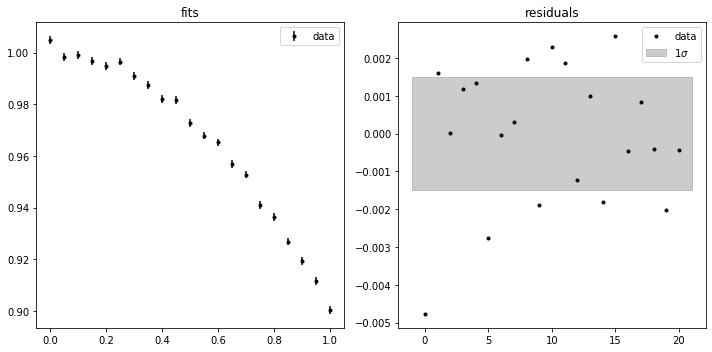

In [0]:
# Plot the fit results and their residuals
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('fits')
ax[0].errorbar(x, y, yerr=y_error, fmt='k.', label='data')
# TODO: Overlay the plots of the fits to compare
ax[0].legend()

ax[1].set_title('residuals')
ax[1].plot(y_true - y, 'k.', label='data')
# TODO: Overlay the residuals of the different fit models to compare. 
ax[1].fill_between(ax[1].get_xlim(), -sigma_y, sigma_y, color='grey', alpha=0.4, label=r'$1\sigma$')
ax[1].legend()
f.tight_layout()

In [0]:
# Show graphically the p-values of each of the fitted models and compare them (check week 5 slide 12). It might be useful to compare 1-pvalue instead of the p-values directly
# TODO
# Draw the plot form lecture notes week 5, page 13 and plot your chi-squares for the different fits. Hint: make a zoom to check the difference on the parabolic and cubic fits
# TODO

From the results, you should have noted that the errors on the parameter estimates are worse for the cubic case than for the quadratic. We could check how the fit behaves for points outside of the fitted range. This can be achieved by getting more measurements, or by doing the fit on a subset of the points. For simplicity, let's suppose we got more measurments.

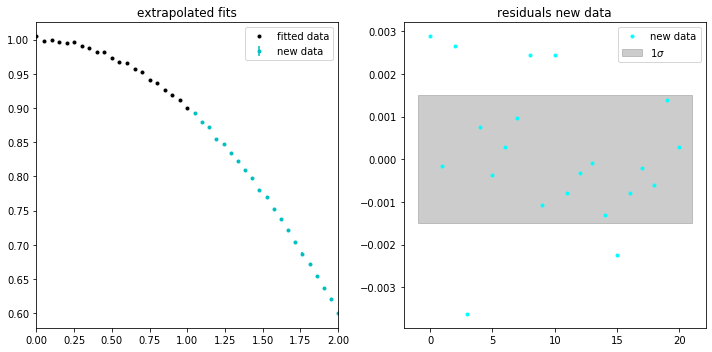

In [0]:
x_new = np.linspace(1.05, 2, 21)
y_true_new = parabola(x_new, a, b, c)
y_new = y_true_new + bNoise(x_new, sigma_y)

f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title('extrapolated fits')
ax[0].plot(x, y, 'k.', label='fitted data')
ax[0].errorbar(x_new, y_new, yerr=y_error, fmt='c.', label='new data')
# TODO: include the extrapolated points from the fits
ax[0].legend()
ax[0].set_xlim(0, 2)

ax[1].plot(y_new - y_true_new, '.', color='cyan', label='new data')
ax[1].set_title('residuals new data')
ax[1].fill_between(ax[1].get_xlim(), -sigma_y, sigma_y, color='grey', alpha=0.4, label=r'$1\sigma$')
# TODO: include the residuals for the extrapolated points on the new data
ax[1].legend()
f.tight_layout()


## Fit a nonlinear function
Next, we consider a Gaussian as an example of a nonlinear function. We are measuring some feature which has a Gaussian distribution in $x$. This could be an inhomogeneous spectral line for $x=E$ the energy of emitted photons. We are interested in the resonance frequency and the linewidth, i. e. we want to estimate them from our observations.

In [0]:
def gaussian_parent(x, mu, sigma):
    """
    PDF of a normal distribution
    :param x: value or array of points to evaluate the pdf
    :param mu: mean of the modeled normal distribution
    :param sigma: standard deviation of the modeled normal distribution
    :return: The value of the pdf of a normal distribution evaluated at 'x' with parameters 'mu' and 'sigma'
    """
    return norm.pdf(x, mu, sigma)    

def gaussian_sample(mu, sigma, sample_size):
    """
    Generates a sample of points normally distributed
    :param mu: mean of the parent normal distribution
    :param sigma: standard deviation of the parent normal distribution
    :param sample_size: number of data points to generate for the sample
    :return: An array points of size 'sample_size' normally distributed (mean 'mu', standard deviation 'sigma'
    """
    return norm.rvs(mu, sigma, sample_size)

# Parent function parameters
mu = 1540
sigma = 11

Below is the code used to generate the files. Feel free to uncomment it and generate a new sample if you want. 

In [0]:
## Create sample
### SAMPLE SIZE
#sample_size = 200
##################

## Prepare fake data
#mu = 1540  # True values that we will try to estimate
#sigma = 11 # using a least-squares fit

#x_arr = np.linspace(1500, 1600, 101)
#bins = 12
#sample = gaussian_sample(mu, sigma, sample_size)
#hist = np.histogram(sample, bins=bins, range=(1500, 1580))
#bin_width = np.diff(hist[1])[0]
#normalization = bin_width * sample_size
#x = hist[1][:-1]+bin_width/2
#y_error_const = 0
#y = hist[0]/normalization + gaussian_sample(0, y_error_const, bins)
#y_errors = np.sqrt((np.sqrt(hist[0]) / normalization)**2 + y_error_const**2)

## Save data
#data = np.vstack((x, y, y_errors))
#np.savetxt('data', data)
#np.savetxt('sample', sample)

In [0]:
# Load data from disk. Format (3,12): (x, y, y_error) x N 
data = np.loadtxt('data')
x = data[0, :]
y = data[1, :]
y_error = data[2, :]
# The sample used to generate
sample = np.loadtxt('sample')

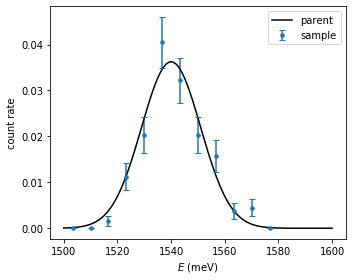

In [0]:
# Plot the measurement results
x_arr = np.linspace(1500, 1600, 101)
plt.figure(figsize=(5, 4))
plt.xlabel(r'$E$ (meV)')
plt.ylabel('count rate')
plt.plot(x_arr, gaussian_parent(x_arr, mu, sigma), '-', color='black', label='parent')
plt.errorbar(x, y, yerr=y_error, fmt='.', ms=7, capsize=3, label='sample')
plt.legend()
plt.tight_layout()

In [0]:
# Function we want to fit to our data set
def model_function(x, *args):
    """
    PDF of the modeled normal distribution
    :param  x: value or array to evaluate the normal distribution
    :param *args: array containing ['mu', 'sigma'] that describe the normal distribution
    :return: The value of the PDF of a normal distribution evaluated at 'x' with parameters 'mu' and 'sigma'
    """
    # TODO

Perform the fit minimizing least squares. How do the parameters of the fit compare with the estimators of the data sample?
Hint: Use curve_fit with the model_function you completed above.

In [0]:
# initial_guess = [mu_guess, sigma_guess] # TODO: array with the initial parameters for the fit. Use the plot above to replace 'mu_guess' and 'sigma_guess'
 # TODO fit the data giving an initial guess. Compute the errors from the covariance matrix obtained from the fit

 print('Fit Results:')
 # TODO

 print('Estimators from data:')
 # TODO


### Plot the result

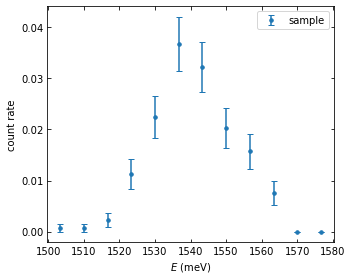

In [0]:
x_arr = np.linspace(1500, 1600, 101)

plt.figure(figsize=(5, 4))
plt.xlabel(r'$E$ (meV)')
plt.ylabel('count rate')
plt.errorbar(x, y, yerr=y_error, fmt='.', ms=7, capsize=3, label='sample')
# TODO: plot your initial guess
# TODO: plot the fitted curve
plt.legend()
plt.tight_layout()

## Biased estimator example
Take a lognormal sample and try to estimate its mean. Try it by fitting a Gaussian for all the points, and then for a sample 0.5 units away from the mean - What do you observe?

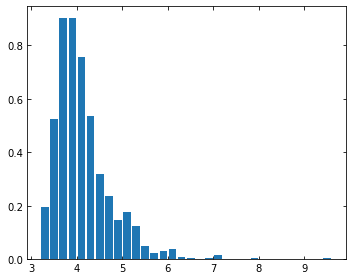

In [0]:
log_sample = lognorm.rvs(s=0.5, loc=3, scale=1, size=1000)
plt.figure(figsize=(5, 4))
h = plt.hist(log_sample, bins=32, rwidth=0.85, normed=True, label='data')

def model_function2(x, *args):
    """
    Scaled PDF of the modeled normal distribution
    :param  x: value or array to evaluate the normal distribution
    :param *args: array containing ['A', 'mu', 'sigma'] that describe the normal distribution. 'A' is the scaling parameter
    :return: The value of the PDF of a normal distribution evaluated at 'x' with parameters 'mu' and 'sigma', scaled by 'A'
    """
    # TODO

# extract the x and y values from the histogram:
x = # TODO. x is an array with the centers of the bins of the histogram
y = # TODO. y is an array with the height of the bins of the histogram
# initial_guess = [A_guess, mu_guess, sigma_guess] # TODO: array with the initial parameters for the fit. Use the plot to eximate 'A_guess', 'mu_guess' and 'sigma_guess'
gauss_fit_large = # TODO
local = np.where(np.abs(x - np.mean(log_sample)) < 0.5) # boolean array which indicates the points of 'x' which are 0.5 away from the sample mean
gauss_fit_local = # TODO

x_arr = np.linspace(2, 8, 101) # array for plotting
local_fit_plot = np.where(np.abs(x_arr = np.mean(log_sample)) < 0.5)
# TODO: plot the fit using 'gauss_fit_large' over all the range
# TODO: plot the local fit around the mean using 'gauss_fit_local' over the range given by 'local_fit_plot'
plt.legend()
plt.tight_layout()

print('Expectation value:', lognorm.mean(s=0.5, loc=3, scale=1))
print('Sample mean:', np.mean(log_sample))
print('Gauss fit all data:', gauss_fit_large[0][1])
print('Gauss fit small sample around mean:', gauss_fit_local[0][1])

## Bonus: Errors in x and y
So far, we considered uncertainties only on y. Consider the following data set with errors in both x and y. Try to fit a line to the data below, taking into account both errors. Compare with fits neglecting the x errors or both.  
  
Hint: A detailed solution is already on the moodle. You may chose if you want to try to write your own solution, implement a known solution (see references in solution notebook) or just try it with the scipy package ODR (orthogonal distance regression). 
https://docs.scipy.org/doc/scipy/reference/odr.html
  
The solution contains a python implementation of York's equation, comparison with ODR and MC tests.  
(Check straight_line_fit.ipynb)


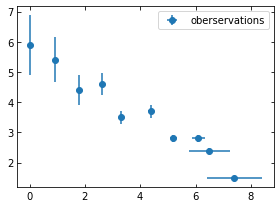

In [0]:
# Test data
X = np.array([0.0, 0.9, 1.8, 2.6, 3.3, 4.4, 5.2, 6.1, 6.5, 7.4])
Y = np.array([5.9, 5.4, 4.4, 4.6, 3.5, 3.7, 2.8, 2.8, 2.4, 1.5])
wX = np.array([1000, 1000, 500, 800, 200, 80, 60, 20, 1.8, 1])
wY = np.array([1, 1.8, 4, 8, 20, 20, 70, 70, 100, 500])
sigma_x = 1.0/np.sqrt(wX)
sigma_y = 1.0/np.sqrt(wY)

plt.figure(figsize=(4, 3))
plt.errorbar(X, Y, xerr=sigma_x, yerr=sigma_y, fmt='o', label='oberservations')
plt.legend()
plt.tight_layout()